<a href="https://colab.research.google.com/github/XavierCarrera/Statistical-Data-Analysis-Python/blob/master/Titanic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib

Using matplotlib backend: agg


In [45]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
bicicletas-compartidas.csv   juego-azar.csv	     rating-peliculas.csv
compensacion-ejecutivos.sav  london_merged.csv	     titanic-master-table.csv
covid_19_data.csv	     Meteorite_Landings.csv  train.csv
iris-data.csv		     poblacion.csv


In [46]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df = df.drop(['Cabin'], axis = 1) 

In [ ]:
df = df[df.Age.notna()]

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

In [ ]:
for i in vars_disc:
  df[i].value_counts()

In [ ]:
vars_cat = ['Pclass', 'Sex', 'Embarked']

# One hot encoding

def one_hot():
  for i in vars_cat:
    categories = df[i].value_counts().index
    print(categories)

    for k in categories:
      name = 'is-' + str(i) + '-' + str(k)
      print(name)
      df[name] = np.where(df[i] == k, 1, 0)

    df = df.drop([i], axis = 1)

In [ ]:
# Outliers

def clean_column(column):
    
    Q1 = np.percentile(column, q = 25)
    Q3 = np.percentile(column, q = 75)

    RI = Q3-Q1

    lim_inf = Q1-1.5*RI
    lim_sup = Q3+1.5*RI
    
    clean_column = []
    for data in column:
        if data > lim_inf and data < lim_sup:
            clean_column.append(data)
    final_column = pd.Series(clean_column)
    return final_column

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']


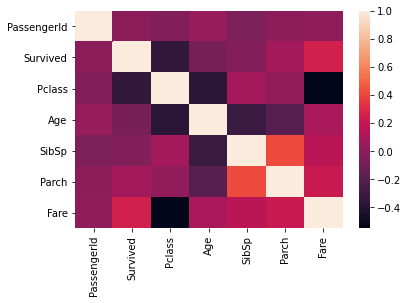

In [47]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
y = df['Survived']
X = df[['Age', 'SibSp', 'Fare']]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = [
       (LogisticRegression(), 'reg-log'),
       (DecisionTreeClassifier()), 'arbol-class'
]

In [ ]:
import joblib
from sklearn.tree import DecisionTreeClassifier

for model, name in clf:

  #Training
  model.fit(X_train, y_train)
  #Measure
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(name)
  print('Resultado en la prueba del modelo : ', round(accuracy*100, 2), '%')


  #Save
  job_file = 'model-' + name + '.pkl'
  joblib.dump(model, job_file)